# Model Development
This notebook handles:
1. Model Training
2. Model Evaluation
3. Model Comparison

In [37]:
import pandas as pd

import utils.model_development as md

X_train, X_test, y_train, y_test = md.load_split_datasets()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18001, 26), (4501, 26), (18001,), (4501,))

## Model Training and Evaluation

In [40]:
evaluation = pd.DataFrame(columns=["mae", "mse", "rmse", "r2", "mape"])
evaluation.index.name = "Model"

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

md.train_model(X_train, X_test, y_train, y_test, LinearRegression(n_jobs=-1), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475


### Ridge Regression

In [42]:
from sklearn.linear_model import Ridge

md.train_model(X_train, X_test, y_train, y_test, Ridge(random_state=42), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354


### ElasticNet Regression

In [43]:
from sklearn.linear_model import ElasticNet

md.train_model(X_train, X_test, y_train, y_test, ElasticNet(alpha=0.1), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906


### Support Vector Regression (SVR)

In [44]:
from sklearn.svm import SVR

md.train_model(X_train, X_test, y_train, y_test, SVR(kernel="linear"), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906
SVR,343257.45457,215830225233.512115,464575.317073,0.046113,0.376802


### Decision Tree Regression

In [45]:
from sklearn.tree import DecisionTreeRegressor

md.train_model(X_train, X_test, y_train, y_test, DecisionTreeRegressor(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906
SVR,343257.45457,215830225233.512115,464575.317073,0.046113,0.376802
DecisionTreeRegressor,208747.894481,98933609118.483322,314537.134721,0.562751,0.218843


### Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

md.train_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state=42, n_jobs=-1),
               evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906
SVR,343257.45457,215830225233.512115,464575.317073,0.046113,0.376802
DecisionTreeRegressor,208747.894481,98933609118.483322,314537.134721,0.562751,0.218843
RandomForestRegressor,159108.621914,56411571575.879471,237511.203053,0.750682,0.170447


### Gradient Boosting Regression

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

md.train_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(learning_rate=0.2, random_state=42),
               evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906
SVR,343257.45457,215830225233.512115,464575.317073,0.046113,0.376802
DecisionTreeRegressor,208747.894481,98933609118.483322,314537.134721,0.562751,0.218843
RandomForestRegressor,159108.621914,56411571575.879471,237511.203053,0.750682,0.170447
GradientBoostingRegressor,167712.382746,57381430476.377823,239544.214032,0.746396,0.182244


### K-Nearest Neighbors Regression

In [48]:
from sklearn.neighbors import KNeighborsRegressor

md.train_model(X_train, X_test, y_train, y_test,
               KNeighborsRegressor(n_neighbors=9, weights="distance", metric="manhattan", n_jobs=-1),
               evaluation=evaluation,
               save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906
SVR,343257.45457,215830225233.512115,464575.317073,0.046113,0.376802
DecisionTreeRegressor,208747.894481,98933609118.483322,314537.134721,0.562751,0.218843
RandomForestRegressor,159108.621914,56411571575.879471,237511.203053,0.750682,0.170447
GradientBoostingRegressor,167712.382746,57381430476.377823,239544.214032,0.746396,0.182244
KNeighborsRegressor,192819.453757,79188032708.897659,281403.682828,0.650019,0.212259


### Bayesian Regression

In [49]:
from sklearn.linear_model import BayesianRidge

md.train_model(X_train, X_test, y_train, y_test, BayesianRidge(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906
SVR,343257.45457,215830225233.512115,464575.317073,0.046113,0.376802
DecisionTreeRegressor,208747.894481,98933609118.483322,314537.134721,0.562751,0.218843
RandomForestRegressor,159108.621914,56411571575.879471,237511.203053,0.750682,0.170447
GradientBoostingRegressor,167712.382746,57381430476.377823,239544.214032,0.746396,0.182244
KNeighborsRegressor,192819.453757,79188032708.897659,281403.682828,0.650019,0.212259
BayesianRidge,230744.544279,94846962600.989746,307972.340643,0.580813,0.263748


### ARD Regression

In [50]:
from sklearn.linear_model import ARDRegression

md.train_model(X_train, X_test, y_train, y_test, ARDRegression(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,230575.967908,94786603952.003357,307874.331428,0.58108,0.263475
Ridge,230612.511699,94796120866.619827,307889.786883,0.581037,0.26354
ElasticNet,232436.754542,96315887776.28125,310348.01075,0.574321,0.264906
SVR,343257.45457,215830225233.512115,464575.317073,0.046113,0.376802
DecisionTreeRegressor,208747.894481,98933609118.483322,314537.134721,0.562751,0.218843
RandomForestRegressor,159108.621914,56411571575.879471,237511.203053,0.750682,0.170447
GradientBoostingRegressor,167712.382746,57381430476.377823,239544.214032,0.746396,0.182244
KNeighborsRegressor,192819.453757,79188032708.897659,281403.682828,0.650019,0.212259
BayesianRidge,230744.544279,94846962600.989746,307972.340643,0.580813,0.263748


## Model Comparison

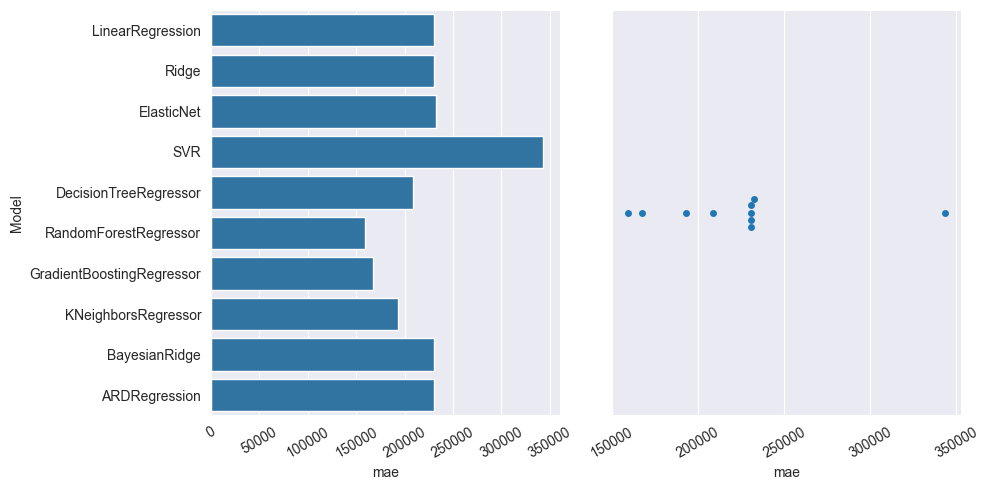

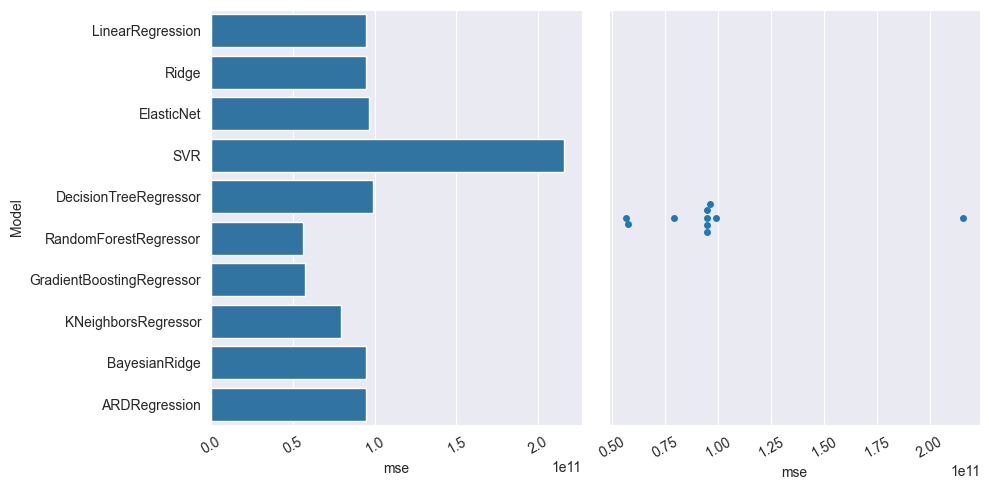

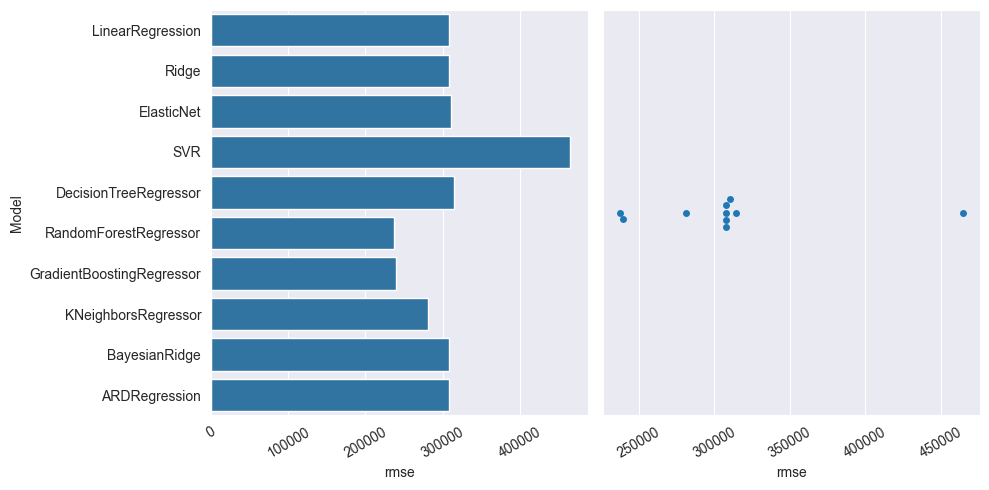

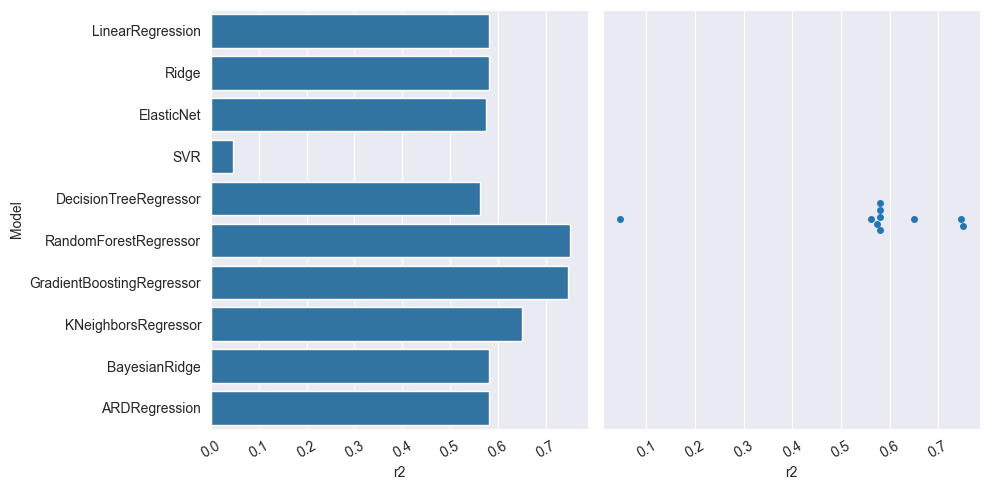

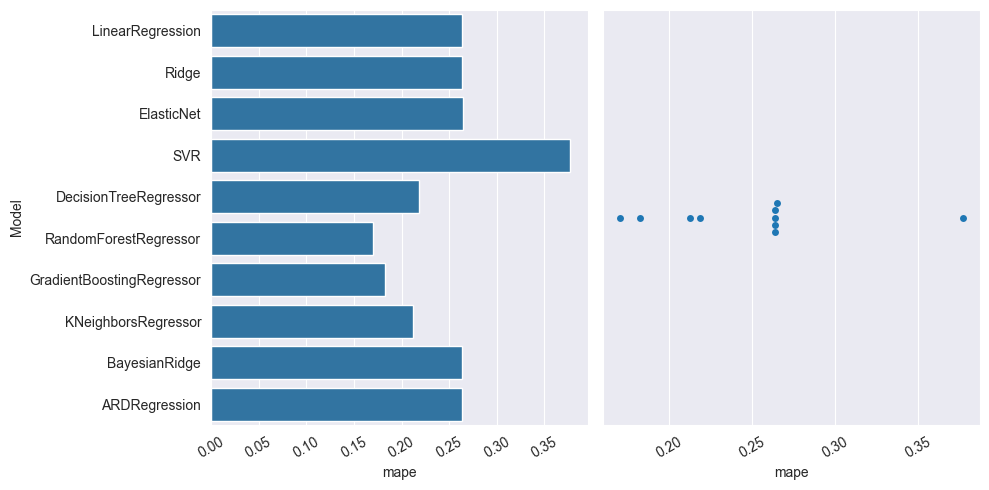

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in evaluation.columns:
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.barplot(data=evaluation, x=column, y=evaluation.index, ax=axes[0])
    axes[0].tick_params(axis="x", labelrotation=30)
    sns.swarmplot(data=evaluation, x=column, ax=axes[1])
    axes[1].tick_params(axis="x", labelrotation=30)
    plt.tight_layout()
    plt.show()

In [52]:
eval_long = evaluation.reset_index().melt(id_vars="Model", value_vars=["mae", "rmse", "r2", "mape", "mse"],
                                          var_name="Metric", value_name="Score")
eval_long.head()

,Model,Metric,Score
0,LinearRegression,mae,230575.967908
1,Ridge,mae,230612.511699
2,ElasticNet,mae,232436.754542
3,SVR,mae,343257.45457
4,DecisionTreeRegressor,mae,208747.894481


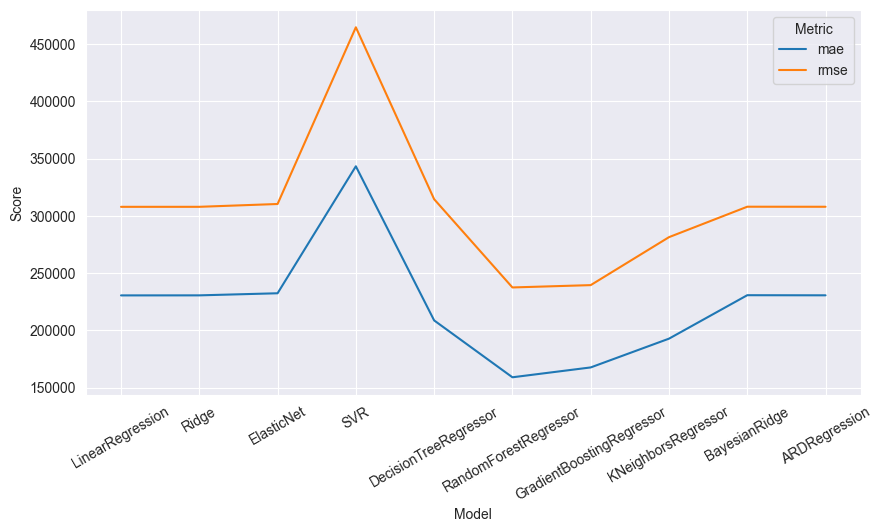

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["mae", "rmse"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=30)
plt.show()

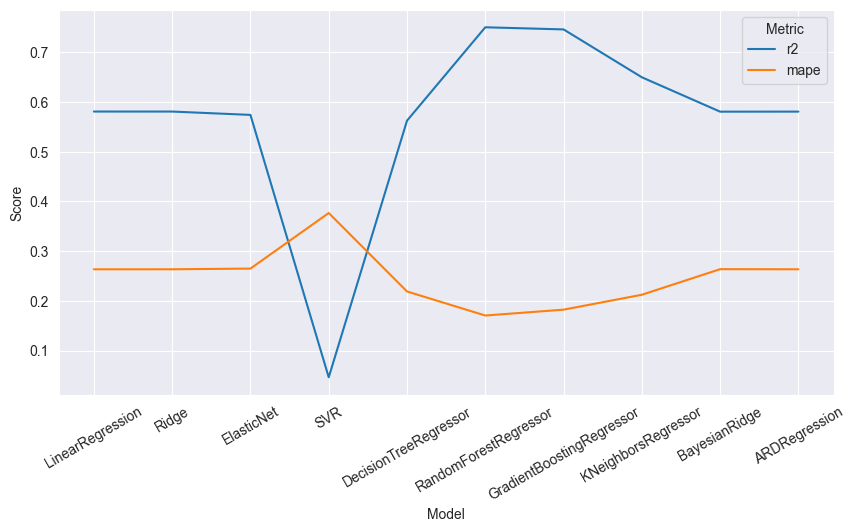

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["r2", "mape"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=30)
plt.show()

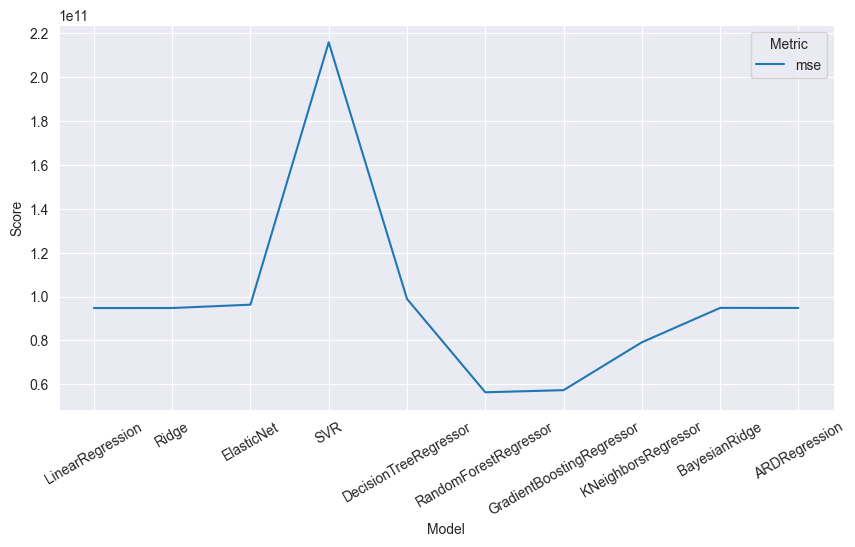

In [55]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["mse"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=30)
plt.show()